## HOMEWORK FOR PREVIOUS WEEK (10/14/2019)
This part of HW wasnt taught in full until this week therefore will be linked onto this weeks HW file (HW#8)

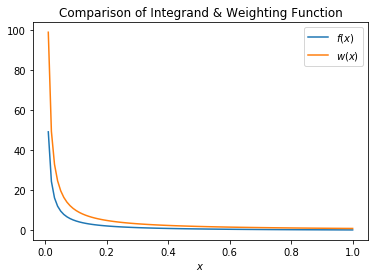

In [17]:
#graph the function and compare the weighted functions appropriateness
f = lambda x: 1/x/(np.exp(x)+1)
w = lambda x: 1/x

x = np.linspace(0,1,100)
plt.plot(x[1:], f(x[1:]), label='$f(x)$') # start w/ 2nd element 
plt.plot(x[1:], w(x[1:]), label='$w(x)$') # to avoid div. by 0
plt.title("Comparison of Integrand & Weighting Function")
plt.xlabel("$x$")
plt.legend()
plt.show()

In order to find the probability function P(x), we need to integrate the weighted function W(x) from [0,1]. The problem arises where the integral is divergent due to ln(0) being undefined

To try to work around this problem, we try to integrate as close as possible to 0 using SciPy:

In [18]:
from scipy.integrate import quad
a = 1e-16 
c = quad(w, a, 1)[0]

/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  This is separate from the ipykernel package so we can avoid doing imports until


now, the probability function can be defined as: 
$$ P(x) = \frac{w(x)}{\int_a^b w(x)dx}=\frac{x^{-1}}{c} $$

now the cumulative probablity function can be found:
$$F(x)=\int_a^x p(x)dx= \frac{1}{c}[ln(x)-ln(a)]$$

therefore the inverse cumulative function can be found:
$$F^{-1}(x)=e^{cx+ln(a)}$$

In [22]:
#from previous HW. See Hwk#7
from scipy.integrate import quad
from random import random
def Importantsampling(f, w, F_inv, a, b, N):
    
    #we find the intergral of the weighted function using the quad method 
   # intgralw = quad(w, a, b)[0]
    #find the width of our domain in order to create random points within our domain of interest
    width = b - a
    I = 0
    
    for i in range(N):
        #generate random points within our domain
        integralw = quad(w, a, b)[0]
        x = width*random() + a
        y = F_inv(x)
        I += f(y)/w(y)
        
    return I/N*integralw

In [30]:
from math import e, log

ln_a = log(a)
F_inv = lambda x: pow(e, (c*x+ln_a))

print("I[a, 1] ≈",  Importantsampling(f, w, F_inv, a, 1, 20000))

/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


I[a, 1] ≈ 18.17023807307873


In [29]:
print("From SciPy: I ≈", quad(f, a, 1)[0])

From SciPy: I ≈ 18.177236466242032


/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


## HOMEWORK FOR THIS WEEK (10/21/2019)

In [7]:
#generate two random numbers 
import numpy as np
a=np.random.randint(1,7)
b=np.random.randint(1,7)

print("dice #1:",a)
print("dice #2:",b)


dice #1: 6
dice #2: 2


In [8]:
#role the dice N number of times 
import numpy as np
N0=1000000
d=[]
count=0
for i in range(N0):
    a=np.random.randint(1,7)
    b=np.random.randint(1,7)
    if (a==6)&(b==6):
        count= count+1
    c=[a,b]
    d.append(c)
#print(d)  
print("Total number of rolls:",N0)
print("Number of double 6's is:",count)
print("Probability of rolling double 6's is:",count/N0*100,"%")
    

Total number of rolls: 1000000
Number of double 6's is: 27806
Probability of rolling double 6's is: 2.7806 %


[-5, -3, 0, -5, 1, -2, 3, -5, 0, -1]


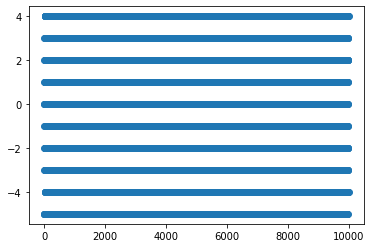

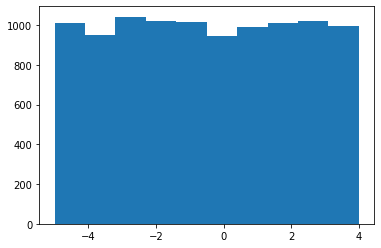

In [9]:
#generate random integers within [-5, 5], find the magic series of {a, c, m} 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

N = 10000
a = 7**7
c = 1012
m = 2**31 #4245035300
x = 1
results = []

for i in range(N):      
    x = (a*x+c)%m
    results.append(x)
results = [int(x/m*10)-5  for x in results]

print(results[:10])
plt.plot(results,"o")
plt.show()

plt.hist(results)
plt.show()

## Brownian motion animation .Gif creation 

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


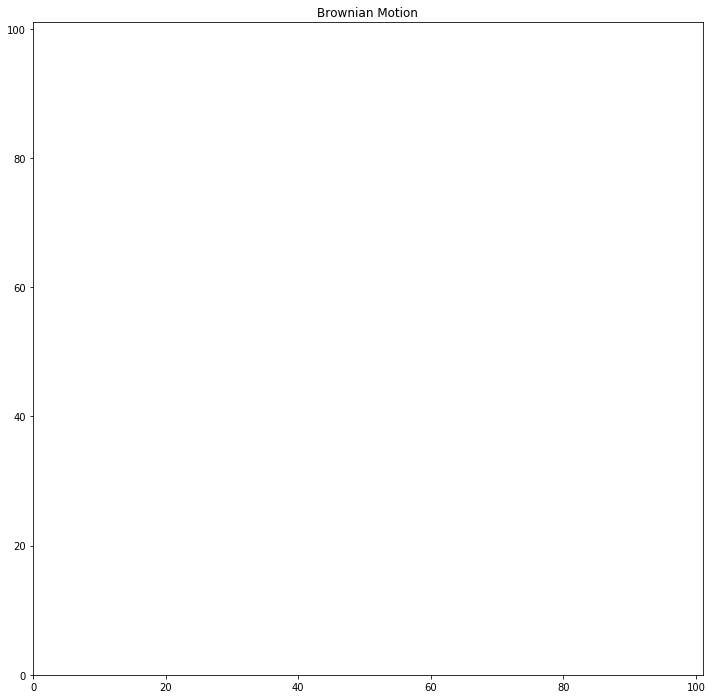

In [10]:
#animation for Brownian motion
%matplotlib inline
from matplotlib import animation


# Brownian Motion
L1 = 101
L2 = 101
N = 450

fig = plt.figure(figsize=[12, 12])
ax = plt.axes(xlim=(0,L1), ylim=(0,L2))
plt.title('Brownian Motion')
coordinate, = ax.plot([], [], "o")

x = int(L1/2)
y = int(L2/2)
position = [x, y]
position1 = [0,0]
direction = np.array([ [0, 1], [0, -1], [1, 0], [-1, 0] ])


def init():
    coordinate.set_data([], [])
    return coordinate,


def animate(i):
    global position
    position1 = [-1,-1]
    while min(position1) < 0 or position1[0] > L1 or position1[1] > L2:
        move = np.random.randint(len(direction))
        position1 = position + direction[move]
    position = position1
    coordinate.set_data(position[0], position[1])
    return coordinate,


anim = animation.FuncAnimation(fig, animate, init_func=init,
    frames=N, interval=15,repeat=False)

anim.save('Movement.gif')

## Probablilty (description from class below)

As shown in the above, the probability that a atom decays in time $t$ is $1-2^{-t/\tau}$, and hence the probability that it decays in a time interval $dt$ is
$$1-2^{-dt/\tau} = 1-\exp(-\frac{dt}{\tau}\text{ln}2) = \frac{\text{ln}2}{\tau}dt$$

Then we calculate the total probability of decaying an atom between $t$ and $t+dt$. In order to undergo such a decay,
an atom must survive without decay until time $t$, which happens with $p=2^{-t/\tau}$, and then decay in dt interval:

$$P(t)dt = 2^{-t/\tau}\frac{\text{ln}2}{\tau}dt$$

This is an example of non-uniform probability distribution. The decay times t are distributed in proportion to $2^{-t/\tau}$, 
so that ealier decay times are more probable than late ones.

A more efficient way to calculate the decay of a sample is to generate N random numbers from this non-uniform probability distribution, to represent the time at which each of the atom decays. Then creating curves as a function of time, is simply a matter of counting how many of the atoms decay before any given time.

It is possible to generate non-uniform random numbers from a wide range of different distributions, including the exponential distribution, using the previous method. If you already have a source of uniform random numbers, one could turn them into nonuniform ones using some `transformation methods`.

Suppose you have a source of random floating numbers z from a distribution with a probability of q(z). And supposed that you have a function x(z). Then when z is one of our random numbers, x(z) is also a random number, but it will have different distribution according to x(z). 

$$p(x)dx = q(z)dz$$
$$\int_{-\infty}^{x(z)} p(x')dx' = \int_0^z dz'=z$$

As an example, suppose we want to integrate random real numbers x in the interval from zero to infinity with the exponential probability distribution

$$p(x)=\mu e^{-\mu x}$$

The leading factor of $\mu$ is necessary to make the distribution properly normalized. This is the same distribution that in the radioactive decay problem above, where $\mu=\text{ln}2/\tau$.

For this distribution,
$$\mu \int_0^{x(z)} e^{-\mu x'} dx' = 1-e^{-\mu x} = z$$

Therefore,

$$x = -\frac{1}{\mu}\text{ln}(1-z)$$

So all we need is to generate uniform random numbers z in the interval from zero to one and feed them into this equation to get exponentially distributed x values.

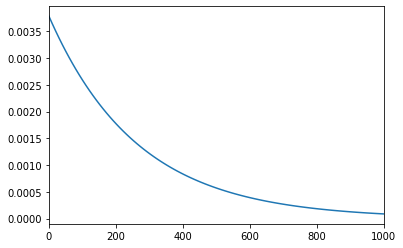

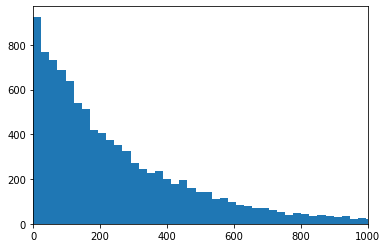

In [11]:
# first generate and show the probability distribution P(x)
tau = 3.053*60 # half-life of Thallium-208
mu = np.log(2)/tau
x = np.linspace(0, 1000, 100)
P = mu*np.exp(-mu*x)

plt.plot(x, P)
plt.xlim(0, 1000)
plt.show()

#create random number generator following distribution
N = 10000
xvalues = []
for i in range(N):    
    z = np.random.random()
    xvalues.append(-np.log(1-z)/mu)

plt.hist(xvalues, 100)
plt.xlim(0, 1000)
plt.show()


Now to graph the decay of thalium with the use of the newly randomly generated numbers following a non-uniform distrubution

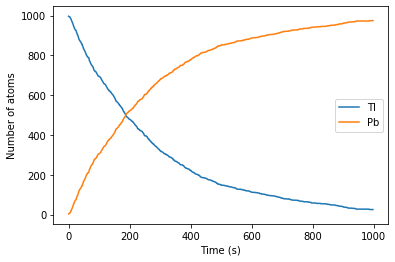

In [12]:
mu = np.log(2)/tau

N_atom = 1000   # number of  Tl atoms
N_time = 1000   # time spent in seconds

N_Pb = np.zeros([N_time-1])  #array to store the number of decayed atoms each second 
N_Tl = N_atom * np.ones([N_time-1])  #array to store the number of decayed atoms each second

for i in range(N_atom):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) #the time to decay from random number
    if x0<N_time:     
        N_Pb[x0:] += 1  #increased lead due to decay
        N_Tl[x0:] -= 1  #reduced Tl due to decay
        
plt.plot(N_Tl, label='Tl')
plt.plot(N_Pb, label='Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")

plt.legend()
plt.show()